# 7장 시계열 데이터를 다뤄보자

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    


In [2]:
from fbprophet import Prophet
from datetime import datetime

In [3]:
path="c:/Windows/Fonts/malgun.ttf"

import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("sorry unknown system")
    
plt.rcParams['axes.unicode_minus'] = False

In [4]:
pinkwink_web = pd.read_csv("../data/08. PinkWink Web Traffic.csv",
                          encoding='utf-8', thousands=',',
                          names = ['dtae', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
dtae,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


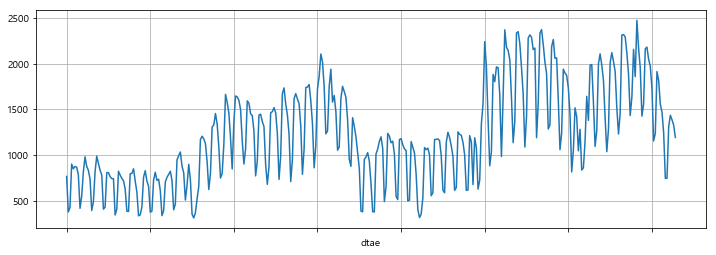

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [6]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [7]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [8]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))




430.85973081109626
430.62841018946943
429.5328046676293
330.4777304444317


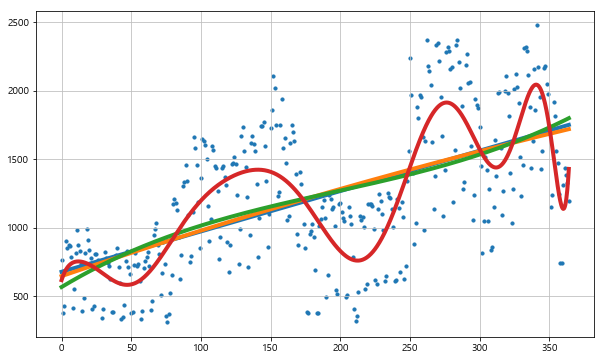

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')


plt.grid(True, linestyle='-', color='0.75')

In [10]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y":pinkwink_web["hit"]})
df.head()


,ds,y
dtae,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0


In [11]:
df.reset_index(inplace=True)
df.head()

,dtae,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0


In [12]:
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
df.head()

,dtae,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [13]:
del df["dtae"]


In [14]:
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [15]:
m= Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,708.664889,1122.886101
421,2017-08-26,497.711704,278.408466,704.157440
422,2017-08-27,630.268176,438.515880,841.850826
423,2017-08-28,1182.888299,976.825873,1399.799793
424,2017-08-29,1218.800002,1014.242458,1419.252236


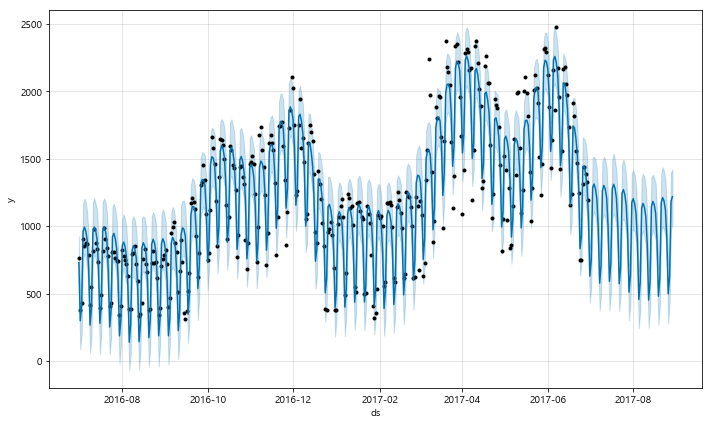

In [18]:
m.plot(forecast);

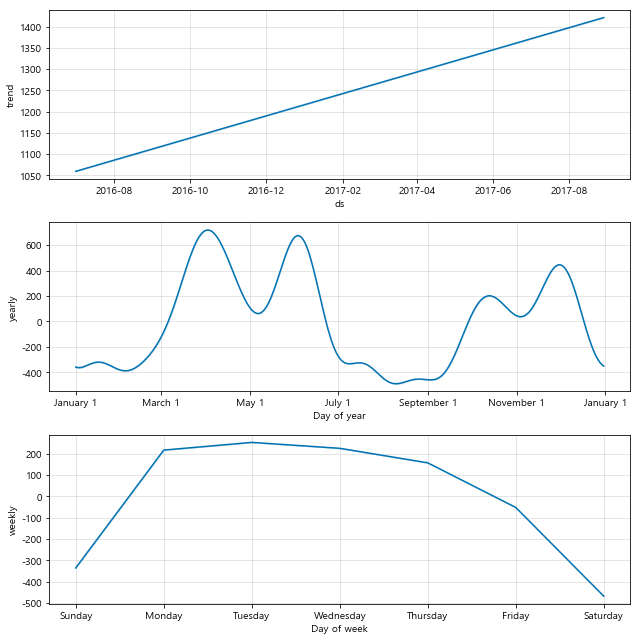

In [19]:
m.plot_components(forecast);

In [20]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,7665.240234,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,7248.089844,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,6935.220215,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,6778.790039,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,7091.649902,1076700


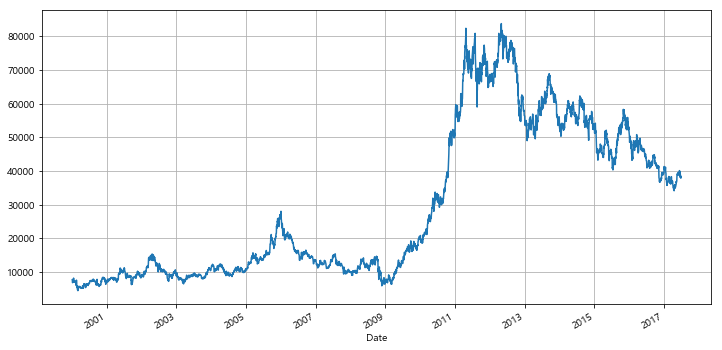

In [21]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [22]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,7665.240234,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,7248.089844,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,6935.220215,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,6778.790039,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,7091.649902,1076700


In [23]:
df = pd.DataFrame({'ds':KIA_trunc.index, "y":KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [24]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2000-01-04
1,2000-01-05
2,2000-01-06
3,2000-01-07
4,2000-01-10
5,2000-01-11
6,2000-01-12
7,2000-01-13
8,2000-01-14
9,2000-01-17


In [30]:
forecast = m.predict(future)

In [31]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,5916.863928,1660.174129,8670.727131,5916.863928,5916.863928,-712.314437,-712.314437,-712.314437,-290.473344,-290.473344,-290.473344,-421.841093,-421.841093,-421.841093,0.0,0.0,0.0,5204.549491
1,2000-01-05,5923.207201,1439.111909,8679.138755,5923.207201,5923.207201,-728.657411,-728.657411,-728.657411,-302.244217,-302.244217,-302.244217,-426.413194,-426.413194,-426.413194,0.0,0.0,0.0,5194.549790
2,2000-01-06,5929.550473,1759.358504,8637.324666,5929.550473,5929.550473,-753.282985,-753.282985,-753.282985,-319.279843,-319.279843,-319.279843,-434.003142,-434.003142,-434.003142,0.0,0.0,0.0,5176.267488
3,2000-01-07,5935.893745,1394.110451,8914.301854,5935.893745,5935.893745,-812.459948,-812.459948,-812.459948,-367.243537,-367.243537,-367.243537,-445.216411,-445.216411,-445.216411,0.0,0.0,0.0,5123.433797
4,2000-01-10,5954.923562,1523.475489,8712.558131,5954.923562,5954.923562,-863.527359,-863.527359,-863.527359,-357.822151,-357.822151,-357.822151,-505.705208,-505.705208,-505.705208,0.0,0.0,0.0,5091.396203


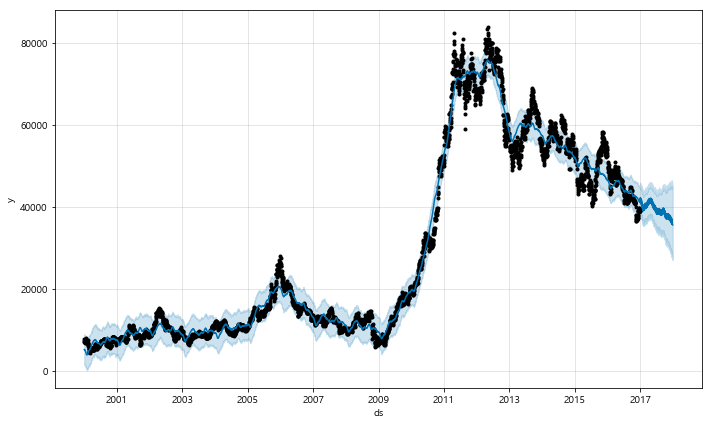

In [33]:
m.plot(forecast);

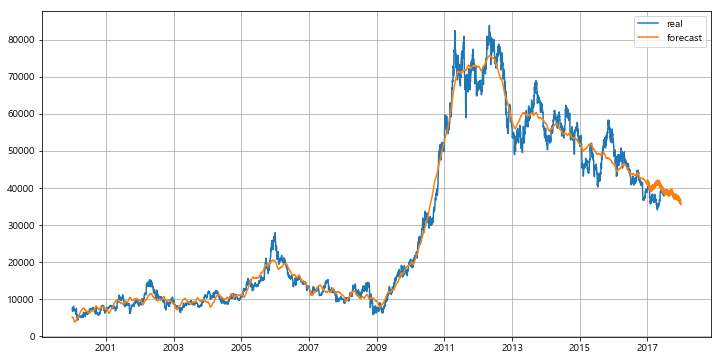

In [38]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'],label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [40]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [41]:
df['cap'] = 8.5

In [47]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


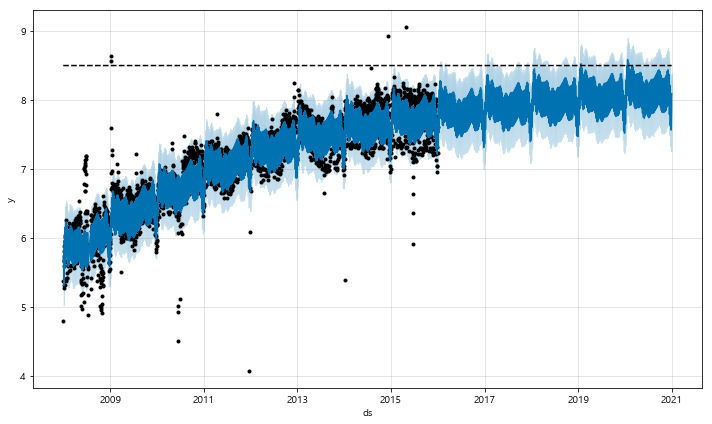

In [48]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

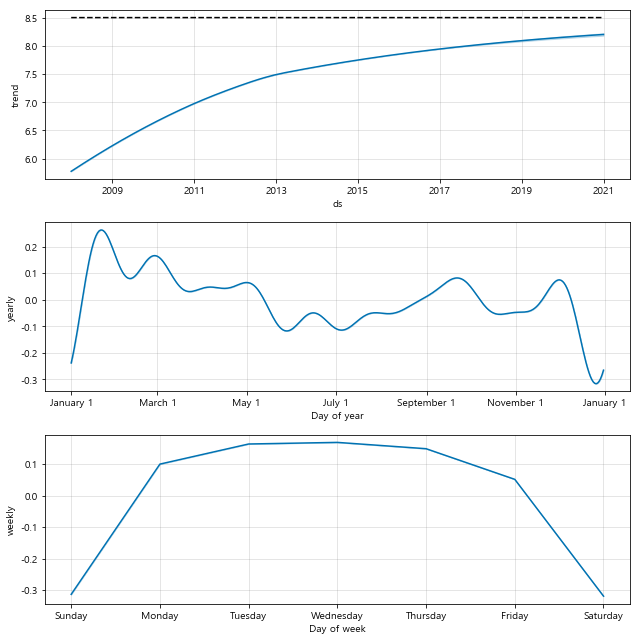

In [52]:
forecast = m.predict(future)
m.plot_components(forecast);
